<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2021 OBSERVING EXERCISE I- Part 1</h2>
<h4>All elements (Part 1 and 2) are due by October 6th at noon.</h4>

<i> I know that this is soon, but things need to work on a somewhat accelerated timescale for us to be ready for our observing. </i>

<i>Note: Enter in all code to the problems in the provided notebook cells. Questions to answer will be <b>bolded</b>.</i>  

As a key element in this class, we are planning to observe remotely with the 0.7m Breyo Observatory at Siena College in the vicinity of Albany, NY. The telescope is equipped with a CCD camera and a variety of broad band filters. The broad-band filters include the standard Sloan Digital Sky Survey *ugriz* set. The plan is to use the scope potentially (weather permitting) to obtain photometry of an open cluster.

All your answers should be entered using the python notebook templates provided as part of this assignment. Each student will need to hand in their own notebook by uploading it to GitHub.   Just make a repository called `Observing Exercise Part 1` and send me the link.  You don't need to make me a collaborator.

In the code places where you will need to put something or write your own code are specified by `#***************`

<h3>Part 1</h3>
To plan your observing, you need to derive a few basics about the combined scope/ instrumentation. The <a href = "https://planewave.com/product/cdk700-0-7m-cdk-telescope-system/">0.7m Breyo telescope</a> at Siena has an optics combination that results in an effective f/6.5 ratio. It is equipped with an electronically cooled <a href = "https://www.flicamera.com/kepler/kepler.html">  Kepler KL4040 camera</a> and a filter wheel assembly from Finger Lakes Instrumentation.  

The KL4040 camera has the GS4040 sCMOS detector described at the bottom of the CCD page.  Note that "4k" in astronomy language means 4096.

<b><u>A)    Given the CCD type and the telescope optics:
<ol> 
    <li>What will be the size in arcseconds of the typical CCD pixel on the KL4040 chip.</li>
    <li>What is the field of view (FOV) of the 0.7m CMOS camera in arc minutes? By FOV I mean the length of one side of the detector. </li>
<ol>
</u></b>
    

   

In [35]:
#Answer A) Here
#You will need to use simple mathematical expressions and what you learned in class to find the asnwers to these.  
#In order to get credit for this part you will need to write an expression that properly executes and results in the answer
#You will need an expression for both parts 1 and 2 above

#******************
#part 1
f = 0.7*6.5 # pical length in m
d = 9e-6 # pixel size in m
S_p = d*206265/f # [areces]

#part 2
FOV = 4096*S_p

print(FOV)

1671.1544967032967


We are using the telescope from Oct. 5-19 depending on the weather. We will need to begin the telescope setup procedure about 1 hour before Sunset so that we are ready to begin taking frames once it becomes dark enough to observe and we can take some calibration frames while the sky is still bright enough. (Note: since we are observing from near Albany, NY, all the questions below need to be answered as if you were in Albany. We can then subtract 1 hour from the times to account for the local observing schedule.) 

<b><u>B)    When does sunset occur on Oct. 10? </u></b>  <i> The end of the code prints your answer in UTC. You need to also print it in Albany and Lawrence time.</i>

In [14]:
#There is a function in the python package astroplan to find the sunset time for a given location and date:
#    https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html#astroplan.Observer.sun_set_time
#This function is a part of the observer class, and takes an input Time object from astropy corresponding to 
# the date. See documentation for astropy's Time object here for reference if needed:
#    https://docs.astropy.org/en/stable/api/astropy.time.Time.html
#Here's an example of how this function works:
#
#    Time_date = Time('2001-05-27')
#    observer_object = Observer(longtiude = -155.0903*u.deg, latitude = 19.7026*u.deg, elevation = 100.0*u.m, name = "Subaru",timezone = "US/Hawaii")
#    sunset_time = observer_object.sun_set_time(Time_date, which = "next")
#
#Note here that Time_date is the date of observation, and which="next" instructs the function to provide the next sunset time
#For details on the observer object, to be used throughout this assignment, see here:
#    https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html
#In general, the observer object takes in a longtiude, latitude, elevation (we assign this as 0), a name of your choice, and a timezone.
#You can view a list of available timezones on this stackoverflow thread:
#    https://stackoverflow.com/questions/13866926/is-there-a-list-of-pytz-timezones


#We import the necessary packages for this section
from astroplan import Observer
from astropy.time import Time
import astropy.units as u
#import warnings
#warnings.filterwarnings("ignore")

#****************
#Here you will need to define the coordinates of the MLO observatory. Note that W and S have negative values (whereas E and N are positive).
#The latitude and longitude need to be put in decimal form, e.g. long = 20.0003, lat = 33.33333 (those are not the right coordinates)
_LONGITUDE_ = -73.756233 #*******************
_LATITUDE_ = 42.652580 #*******************

#This is an astropy Time object, with a time value that corresponds to the date of observation. Date format: Time('YYYY-MM-DD')
_TIME_ = Time('2021-10-10') #*******************


#You now need to make the observer object for the MLO observatory. See the example above for help
Breyo_observer = Observer(longitude = _LONGITUDE_*u.deg, latitude = _LATITUDE_*u.deg, elevation = 43.0*u.m, name = "Breyo",timezone = "US/Eastern") 

#This computes the sunset at the time specified by the TIME object, at the location defined by Breyo_observer
sunset_time = Breyo_observer.sun_set_time(_TIME_, which = "next") 

#The following provides a useful way to print out astropy Time objects in a convenient way. 
#The time returned here is in UTC time
print("Sunset: {0.iso}".format(sunset_time)) 
print(sunset_time)
#*****************
#put calculation here to find sunset time at Breyo and in Lawrence.  Also include code to print answers.
Breyo_time = sunset_time-4.0/24.0
Lawrence_time = sunset_time-5./24.
print("Sunset in Breyo: {0.iso}".format(Breyo_time))
print("Sunset in Lawrence: {0.iso}".format(Lawrence_time))

Sunset: 2021-10-10 22:15:52.489
2459498.4276908496
Sunset in Breyo: 2021-10-10 18:15:52.489
Sunset in Lawrence: 2021-10-10 17:15:52.489


Note – technically, sunset refers to the moment when the entire disk of the sun sinks below the horizon. However, the sky is still quite bright because of scattered/refracted light from the seeing sun. The next key moment is the end of twilight, defined as the moment when the sun’s center is a certain number of degrees below the horizon: civil twilight = 6°, astronomical twilight = 18°. At astronomical twilight, it should be totally dark (Moon excluded).

<b><u>C)    When does <font color="red">astronomical twilight</font> occur on Oct. 10?</u></b>

In [15]:
#There is an astroplan function that can be used to find astronomical twilight for a given time and position(observer):
#    https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html#astroplan.Observer.twilight_evening_astronomical
#This function is a part of the observer class in astroplan, and its inputs are a time object corresponding to
#the date of observation, and an argument which, with possible values previous, nearest, or next, which choose
#the corresponding astronomical twilight to find
#Example:
#    observer_object = Observer(location=location, name="Subaru", timezone="US/Hawaii")
#    astro_twilight = observer_object.twilight_evening_astronomical(Time_date, which = "next")

###
#*******************
#Answer C) Here. YOUR CODE: 
astro_twilight = Breyo_observer.twilight_evening_astronomical(_TIME_,which="next")

#The following provides a useful way to print out astropy Time objects in a convenient way. 
print("Astronomical Twilight UTC: {0.iso}".format(astro_twilight)) 


Astronomical Twilight UTC: 2021-10-10 23:54:02.102


Convert the UTC output to the local time both at the Breyo Observatory and in Lawrence and put the answer and the calculation in the next cell. The result of the cell should print out the twilight time at both locations.

In [20]:
#Part C answer goes here
#*******************

#Lawrence time
Lawrence_twilight = astro_twilight-5./24.
#Breyo time
Breyo_twilight = astro_twilight-4./24.

print("Breyo Twilight: {0.iso}".format(Breyo_twilight))
print("Lawrence Twilight: {0.iso}".format(Lawrence_twilight))

Breyo Twilight: 2021-10-10 19:54:02.102
Lawrence Twilight: 2021-10-10 18:54:02.102


We will be observing for the first half of the night. Given your answer to (C), we will divide the evening into two time slots, each 1.5 HRS long. Let AT = Astronomical Twilight, then the 2 slots are:
<ol>
    <li> <b>time slot 1</b> = AT + 0.0 HR to AT + 1.5 HRS</li>
    <li> <b>time slot 2</b> = AT + 1.5 HRS to AT+ 3.0 HRS</li>
</ol>
A link to the names of everyone and their time slots were posted on Blackboard in Assignments/Observing. You should work within your group to prepare the observing materials discussed below, but everyone will need to hand in their own notebook.

For your group/time slot (assume we observe on Oct. 10th as the times won't very significantly over our observing window):

<b><u>D) What is the optimum range of RA for objects that you would ideally observe during your 1.5-hour session?</u></b> Note: <i>Think about whether objects of a given RA are rising or settng at the beginning and end of your observation session.</i>

Go to the web page https://www.iiap.res.in/people/personnel/reks/software/javascript/calclst.php to find the sidereal time at different local times.  

In the first row, enter the date and desired local time in Albany.  In the second line, enter your shift from UTC to Albany and the longitude of Albany.  Hit return in any box to update.  

Enter the information in the empty markdown box below and make sure to give a rationale as to why this range of RA is appropriate.

*Answer for D goes here:*

For time slot 1,
At the beginning of the observation, the meridian is approximately 20 RA. Since the telescope should be pointing within 30 deg of the zenith, which is equivalent to 2 hours, the range that we are able to see is from 18 RA to 22 RA. After 1.5 hours of observation, the range of sky we are seeing is 19.5 RA to 23.5 RA. For the objects between 18 RA to 19.5 RA, we won't be able to see them the entire time. And for the objects between 22 RA to 23.5 RA, they are rising to the zenith during the observation time, therefore, we may able to see them long enough again. So the objects that we can see the entire time are within 19.5 RA to 22 RA. 

<b>E) If you want to remain within 30° of the zenith, what is the optimum range in declination? You need to answer this in two parts:</b>

1. <b>Given the location of the observatory, objects at their transit need to have what range of declination to be within 30° of the zenith.</b><i> This requires a straightforward calculation</i>
        


In [19]:
#Answer E.1) Here
#*******************
# The latitude of the observatory is at 42.65 deg
# Therefore, the equator would be at (90-42.65) = 47.35 deg
# To look at the sky within 30 deg of the zenith, the lower latitude/declination should be (90-47.35-30) = 12.65 deg
# The maximum declination is (12.65+60) = 72.65 deg

#Part 1:
#   Figure out how to use the observatory's location to find the position of the zenith.
zenith = _LATITUDE_

2. <b>Using airmass plots (see below), determine what range of declinations would keep objects within 30° of the zenith over the course of your 1.5 hour observation block. Your answer will need to include airmass plots to demonstrate this. These plots can contain multiple curves, e.g. for different RA and DEC combinations, as long as the curves are labeled. All plots should come with a caption.</b>


/home/zyz_jenny/anaconda3/lib/python3.8/site-packages/astroplan/plots/time_dependent.py:399: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(time.plot_date, masked_altitude, label=target_name, **style_kwargs)


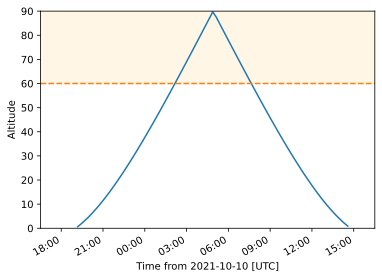

In [33]:
#Here, we will provide you with the code needed to make airmass plots. You will use this to guide your answer to E part 2
###We important all the needed packages
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_altitude
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' #This makes the plots appear better inline in the notebook
###

fig, ax = plt.subplots() #These are the matplotlib Figure and and Axis objects we will plot on

#*******************
#you will need to enter an observation time in UT time format 'YYYY-MM-DD HH:MM:SS'.  
#For this problem, you will need to change this time such that the x-axis of the plot
#starts just before sunset.  Note the time zone of the x-axis in the plot to determine what 
#the right time units are to put in the line below.
observation_time = Time('2021-10-11 04:30:52.489') #*******************

#*******************
#Now, you must define the coordinates for a target in the sky, for which the airmass plot will be made.
#You will have to think about how to define these coordinates to find your answer for question E.2
#With these coordinates, we make a target object using the FixedTarget function from astroplan.
#Using the RA range from Part D, you should play with the DEC parameter until you find which DEC
#values satisfy the altitude constraint.  The `*u.deg` apply degree units to the number.
target_coord = SkyCoord(ra= 19.5*u.deg, dec= zenith*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plot_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,Breyo_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

plt.show()


/home/zyz_jenny/anaconda3/lib/python3.8/site-packages/astroplan/plots/time_dependent.py:399: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(time.plot_date, masked_altitude, label=target_name, **style_kwargs)


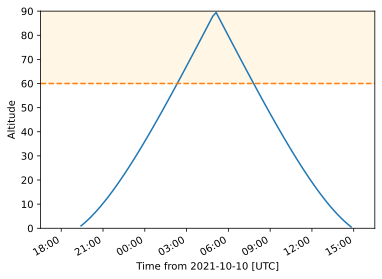

In [34]:
#*******************
#Answer E.2) Here

#Part 2: 
#   You will need to make a series of airmass plots using the code above to figure out which declinations satisfy the requirement here.
#   You can copy the code from above to make the airmass plots! 
#

fig, ax = plt.subplots()
observation_time = Time('2021-10-11 04:30:52.489')

target_coord = SkyCoord(ra= 22*u.deg, dec= zenith*u.deg)
target_source = FixedTarget(coord=target_coord, name="Target")

#We now actually construct the airmass plot. The plot_altitude function makes the airmass plot, with the elevation on the y-axis
plot_altitude(target_source,Breyo_observer, observation_time)

#We will now plot a line and shaded region at and above an elevation of 60 degrees
xmin, xmax = ax.get_xlim()
x_line = np.linspace(xmin,xmax,100)
y = [60]*100
ax.plot(x_line, y, ls = '--')
ax.fill_between(x_line, 60, 90, alpha = 0.1, color= 'orange' )

plt.show()
